In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
twitts = pd.read_csv("twitter_validation.csv")

In [5]:
# Naming each column
column_name=['TweetID','Entity','Sentiment','Tweet_Content']
twitts.columns=column_name
twitts.head()

,TweetID,Entity,Sentiment,Tweet_Content
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [6]:
twitts.columns.tolist()

['TweetID', 'Entity', 'Sentiment', 'Tweet_Content']

In [7]:
twitts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TweetID        999 non-null    int64 
 1   Entity         999 non-null    object
 2   Sentiment      999 non-null    object
 3   Tweet_Content  999 non-null    object
dtypes: int64(1), object(3)
memory usage: 31.3+ KB


In [8]:
twitts.isnull().sum()

TweetID          0
Entity           0
Sentiment        0
Tweet_Content    0
dtype: int64

In [9]:
twitts.duplicated().sum()

0

In [10]:
twitts.dropna(inplace=True)
twitts.drop_duplicates(inplace=True)
print(twitts.isnull().sum())
print("Duplicate Values:",twitts.duplicated().sum())

TweetID          0
Entity           0
Sentiment        0
Tweet_Content    0
dtype: int64
Duplicate Values: 0


In [11]:
# Dropping Irrelevant columns:
twitts.drop(columns=['TweetID','Tweet_Content'],inplace=True)
twitts.head()

,Entity,Sentiment
0,Amazon,Neutral
1,Microsoft,Negative
2,CS-GO,Negative
3,Google,Neutral
4,FIFA,Negative


In [12]:
twitts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Entity     999 non-null    object
 1   Sentiment  999 non-null    object
dtypes: object(2)
memory usage: 15.7+ KB


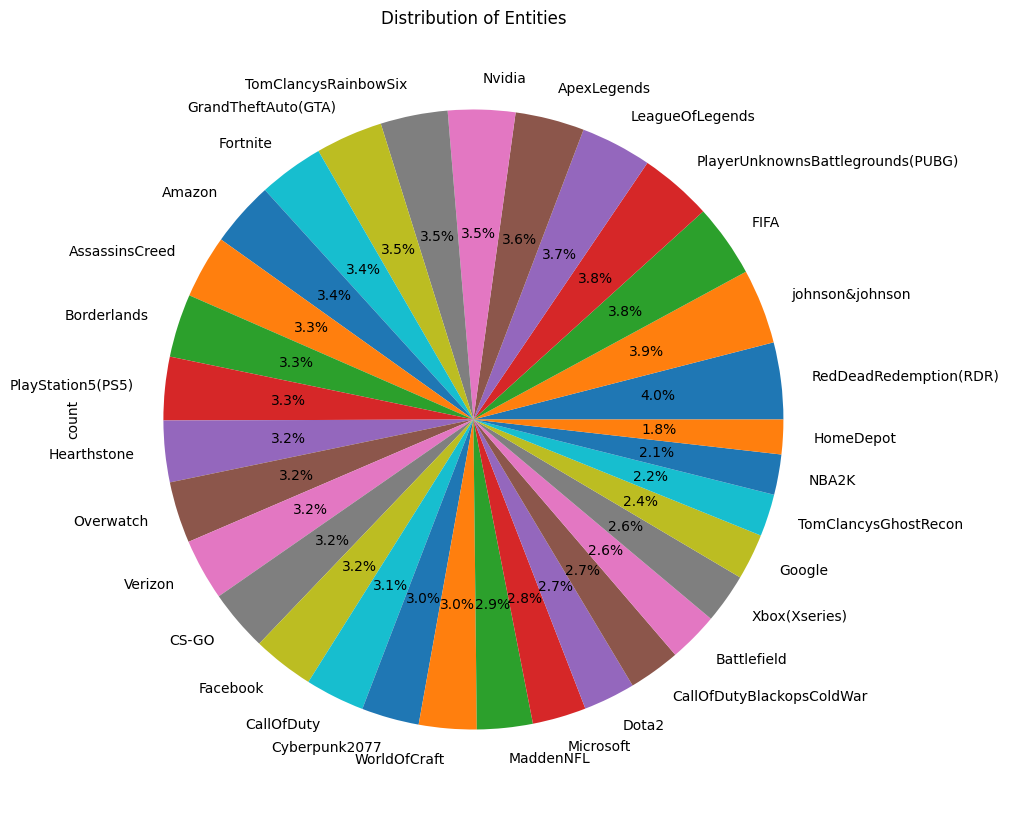

In [14]:

entity_content=twitts['Entity'].value_counts()
entity_content.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 12))
plt.title('Distribution of Entities')
plt.show()

<Axes: xlabel='Sentiment'>

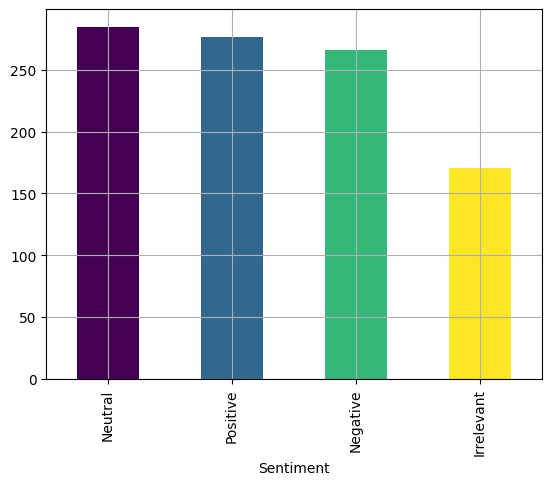

In [17]:
sentiment_content=twitts['Sentiment'].value_counts()
color=plt.get_cmap('viridis')
colors = [color(i) for i in np.linspace(0, 1, len(sentiment_content))]
sentiment_content.plot(kind='bar',color=colors,grid=True)

<Axes: xlabel='Entity'>

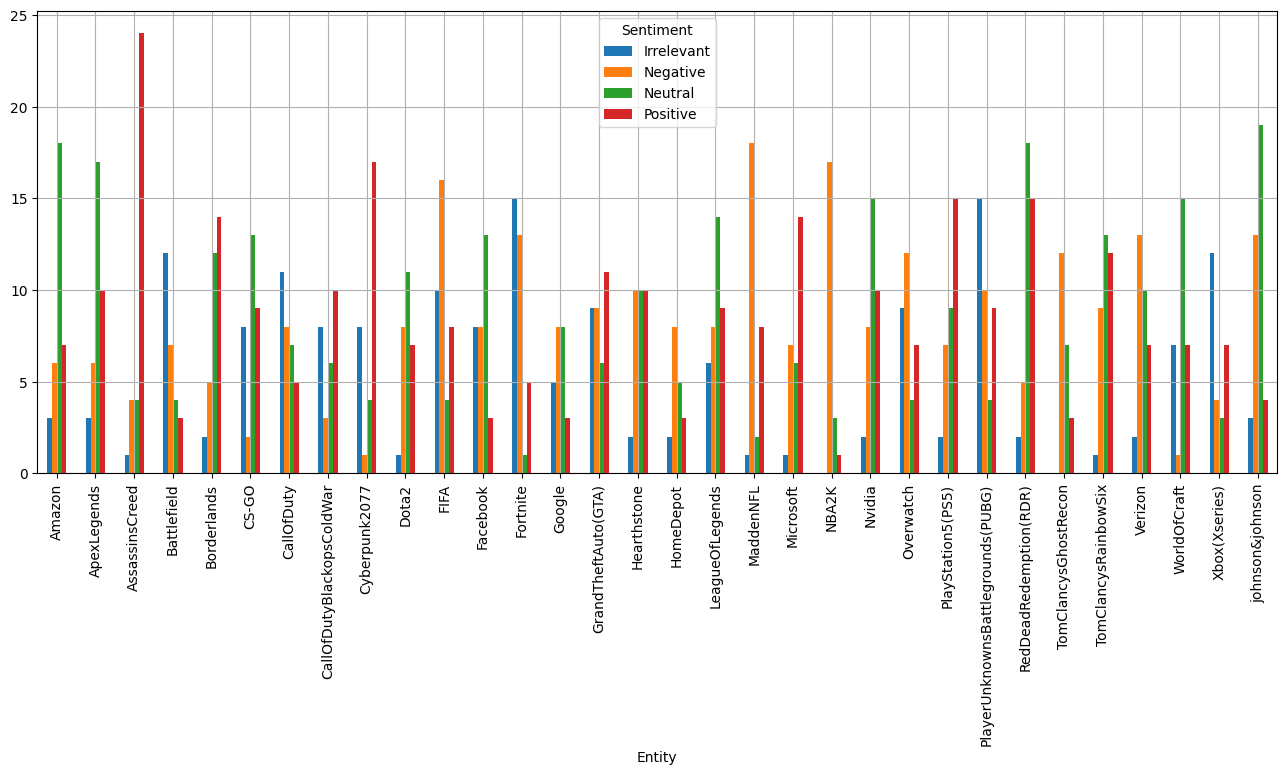

In [18]:
reactions_entities = pd.crosstab(twitts['Entity'],twitts['Sentiment'])
reactions_entities.plot(kind='bar', figsize=(16, 6),grid=True)